In [1]:

#import necessary packages used for manipulating operations on image
#cv2 for reading and displaying, writing image
#numpy for manipulating image as image is matrix of pixel values
#skimage is package which provides many methods which help to transform image

In [2]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [3]:
img= cv2.imread(r"C:\Users\user\ImageAugmentation\i\ab4e0182-ce5d-11eb-b317-38f9d35ea60f.png")
img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #we are converting image to BGR because matplotlib displays image BGR format
#if you are using cv2 for displaying image, no need to convert image to BGR

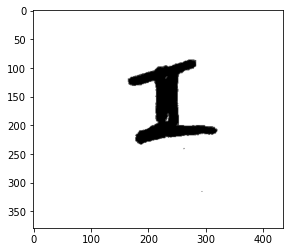

In [4]:
plt.imshow(img)
plt.show()

In [5]:

height, width, dims= img.shape
print(height, width, dims) #print dimensions of original image

379 435 3


In [6]:
img= cv2.resize(img,(32,32))
img.shape

(32, 32, 3)

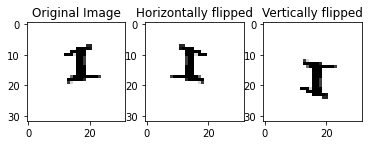

In [7]:
plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(img)

hflipped_image= np.fliplr(img) #fliplr reverse the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(img) #flipud reverse the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()

In [8]:
r_image = rotate(img, angle=45) # angle value is positive for anticlockwise rotation 
r_image1 = rotate(img, angle=-45) 

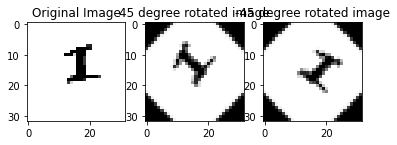

In [9]:
plt.subplot(131)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("45 degree rotated image")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 degree rotated image")
plt.show()

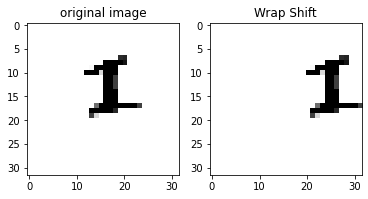

In [10]:
transform = AffineTransform(translation=(-200,0))  # (-200,0) are x and y coordinate, change it see the effect
warp_image = warp(img,transform, mode="wrap") #mode parameter is optional
# mode= {'constant', 'edge', 'symmetric', 'reflect', 'wrap'}
#these are possible values of mode, you can try them and decide which one to use, default value for mode is constant
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Wrap Shift')
plt.imshow(warp_image)

In [11]:
noisy_image= random_noise(img)

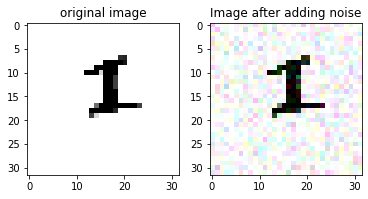

In [12]:
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Image after adding noise')
plt.imshow(noisy_image)

In [13]:
blur_image= cv2.GaussianBlur(img, (5,5),0)

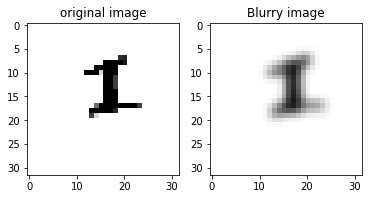

In [14]:
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Blurry image')
plt.imshow(blur_image)

In [15]:
#Lets define functions for each operation
def anticlockwise_rotation(image):
    angle= random.randint(0,70)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,80)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def add_noise(image):
    return random_noise(image)

def blur_image(image):
    return cv2.GaussianBlur(img, (9,9),0)

#I would not recommend warp_shifting, because it distorts image, but can be used in many use case like 
#classifying blur and non-blur images
def warp_shift(image): 
    transform = AffineTransform(translation=(0,40))  #chose x,y values according to your convinience
    warp_image = warp(image, transform, mode="wrap")
    return warp_image

In [16]:
transformations = {'horizontal flip': h_flip, 
                      'vertical flip': v_flip,
                   'warp shift': warp_shift
                 }    

In [17]:
images_path=r"C:\Users\user\ImageAugmentation\i" #path to original images
augmented_path=r"C:\Users\user\ImageAugmentation\AugmentedImage" # path to store aumented images
images=[] # to store paths of images from folder

In [24]:
import ntpath
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

In [25]:
from tqdm import tqdm
import random

In [31]:
for im in tqdm(os.listdir(images_path)):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=500  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate

images = random.choices(images,k=500)

for image in tqdm(images):    
    #image=random.choice(image)
    file_name_image = path_leaf(image)
    original_image = io.imread(image)
    transformed_image=None
    
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
    file_name = im.split(".")  
    new_image_path= "%s/%s_augmented_image_%s.png" %(augmented_path,file_name_image,'04Aug2021')
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].

    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1
#to generate more images, put above 3 statement inside while n<... loop

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 99.34it/s]
